# Exploring Layer Effects in CNNs
Objective: Understand the impact of varying parameters in convolutional and pooling layers on image processing.

## Setup


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img

2023-12-06 09:19:56.304699: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 09:19:56.304877: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 09:19:56.538451: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 09:19:56.975439: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 09:20:00.560713: W tensorflow/compiler/tf2

In [3]:
# Load and prepare data
path = "/home/dorota/projects/Deep-Machine-Learning-Dorota-Bjoorn/lectures/data/cat.jpg"
img = Image.open(path).convert('L').rotate(270).resize((150,150)) 
image_array = tf.keras.utils.img_to_array(img) # Convert to numpy arrary (ok i Tensorflow)
image_array = tf.expand_dims(image_array, 0)  # needed since only 1 sample: dim(150, 150, 1) -> (1, 150, 150, 1)

## Exercise 
Let's create a function to build and visualize CNN Layers. Read through the code below and make sure you understand it.

1/1 [==============================] - 0s 84ms/step


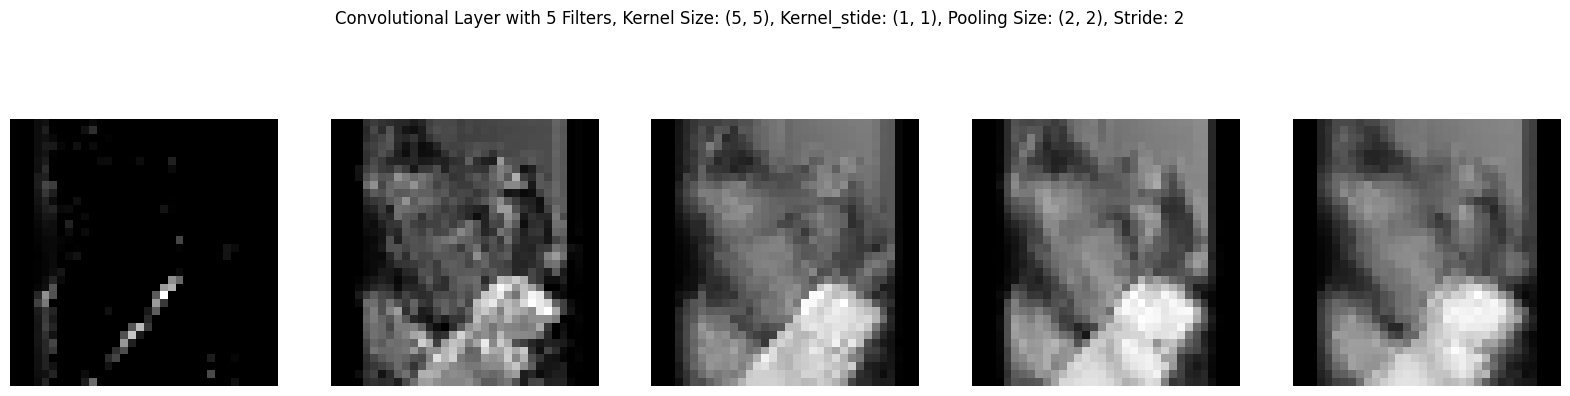

In [18]:
#tf.keras.utils.set_random_seed(1337)

def build_and_visualize_cnn(filters, kernel_size, pooling_size, kernel_stride, pool_stride):
    inputs = Input(shape=(150, 150, 1))
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=kernel_stride, activation='relu')(inputs)
    x = MaxPooling2D(pool_size=pooling_size, strides=pool_stride)(x)
    # additional layer - NOTE: (x)
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=kernel_stride, activation='relu')(x)
    x = MaxPooling2D(pool_size=pooling_size, strides=pool_stride)(x)
    model = Model(inputs=inputs, outputs=x)

    feature_maps = model.predict(image_array)
    fm = feature_maps[0]

    fig, ax = plt.subplots(1, filters, figsize=(20, 5))
    for i in range(filters):
        ax[i].imshow(fm[:, :, i], cmap='gray')
        ax[i].axis('off')
    plt.suptitle(f'Convolutional Layer with {filters} Filters, Kernel Size: {kernel_size}, Kernel_stide: {kernel_stride}, '
                 f'Pooling Size: {pooling_size}, Stride: {pool_stride}')
    plt.show()


build_and_visualize_cnn(filters=5, kernel_size=(5, 5), pooling_size=(2, 2), kernel_stride=(1, 1), pool_stride=2)

What happens if you...

1. Run the above cell several times in a row?
    * Why does the output change?
    * How could you avoid that?
    * Why do we sometimes want to avoid this?

2. Change number of filters? - fler i outputten
3. Increase the stride? Why? - kernel stride skall vara så pass stor så att pooling size (stride) inte överlappar
4. Increase the pooling size? Why?
5. Change the kernel size?

## Bonus exercise:
* What happens if you make the network deeper?
* How does the output feature maps change?
* Edit the network above to add another layer and experiment with the hyperparameters.